In [141]:
from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
from scipy import stats
import numpy as np
import pandas as pd
import sys
import math
from matplotlib import pyplot as plt
import seaborn as sns
import random
from scipy.ndimage import laplace
from scipy.ndimage import gaussian_filter
from scipy.special import binom
from scipy.fft import fft2
random.seed(1234)

In [142]:
plt.rcParams.update({'lines.markersize': 12})

In [143]:
## functions

def get_all_indices(rows,cols):
    indices = []
    for i in range(rows):
        for j in range(cols):
            indices.append((i, j))
    return indices

def get_theory_values(s_list=[1e-3,1e-2,1e-1],L=1,l=1,m=1e-3,Nd=1000,mu=1e-8):
    k_list = get_all_indices(L,L)
    Ntot = Nd*(L/l)**2
    ak_list = [m*(l**2)*((2*np.pi/L)**2)*(np.linalg.norm(k)**2) for k in k_list]
    result = np.zeros((len(s_list),len(k_list)))
    result_mean = np.zeros(len(s_list))
    for i in range(len(s_list)):
        for j in range(len(k_list)):
            result[i,j] = Ntot*mu*(1/s_list[i])*(1/(s_list[i]+ak_list[j]))
            if k_list[j]==(0,0):
                result_mean[i] = Ntot*mu*(1/s_list[i])
    return result_mean, result


Checking that the expected total number of mutant alleles calculated manually matches with the value of $\mathbb{E}[|\hat{C}(\mathbf{0})|]$ calculated via DFT.

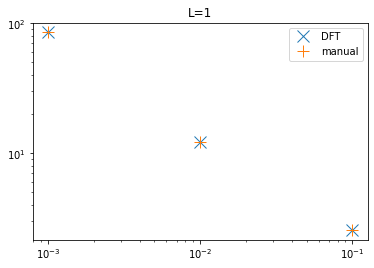

In [145]:
Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=1
num_demes = L**2
list1 = pd.read_csv('L1_list1.csv',header=None)
exptot_man = np.array(pd.read_csv('L1_exptot_manual.csv',header=None))
exptot_man = [sublist[0] for sublist in exptot_man]

plt.plot(s_list,np.array(list1)*Nd,marker="x",linestyle='',label='DFT')
plt.plot(s_list,exptot_man,marker="+",linestyle='',label='manual')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('L='+str(L))
plt.show()

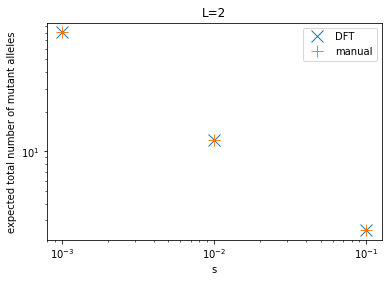

In [146]:
L=2
num_demes = L**2
list1 = pd.read_csv('L2_list1.csv',header=None)
exptot_man = np.array(pd.read_csv('L2_exptot_manual.csv',header=None))
exptot_man = [sublist[0] for sublist in exptot_man]

plt.plot(s_list,np.array(list1)[:,0]*Nd,marker="x",linestyle='',label='DFT')
plt.plot(s_list,exptot_man,marker="+",linestyle='',label='manual')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('L='+str(L))
plt.xlabel('s')
plt.ylabel('expected total number of mutant alleles')
plt.xlabel('s')
plt.ylabel('expected total number of mutant alleles')
plt.show()

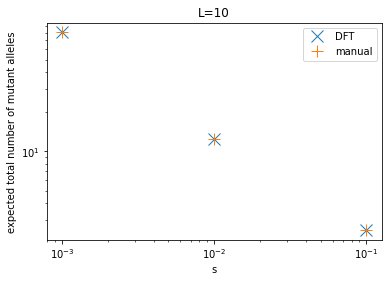

In [147]:
L=10
num_demes = L**2
list1 = pd.read_csv('L10_list1.csv',header=None)
exptot_man = np.array(pd.read_csv('L10_exptot_manual.csv',header=None))
exptot_man = [sublist[0] for sublist in exptot_man]

plt.plot(s_list,np.array(list1)[:,0]*Nd,marker="x",linestyle='',label='DFT')
plt.plot(s_list,exptot_man,marker="+",linestyle='',label='manual')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel('expected total number of mutant alleles')
plt.title('L='+str(L))
plt.show()

Checking sim vs theory values for expected total number of mutant alleles.

[1083.7995362645036, 99.0144154864845, 10.398151349596136]


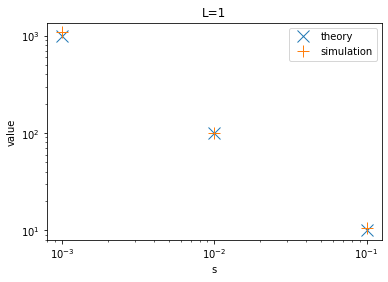

In [148]:
Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=1
num_demes = L**2
list1 = pd.read_csv('L1_list1.csv',header=None)
times = pd.read_csv('L1_times.csv',header=None)

list1 = [sublist[0] for sublist in np.array(list1)]
times = [sublist[0] for sublist in np.array(times)]


 
sims_adj = [list1[i]*times[i]*Nd for i in range(len(list1))]

print(sims_adj)

plt.plot(s_list,[1/s for s in s_list],marker='x',label='theory',linestyle='')
plt.plot(s_list,sims_adj,marker='+',label='simulation',linestyle='')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel('value')
plt.legend()
plt.title("L="+str(L))
plt.show()

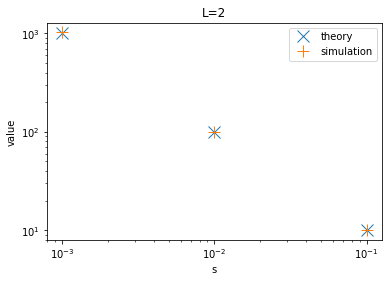

In [149]:
Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=2
num_demes = L**2
list1 = pd.read_csv('L2_list1.csv',header=None)
times = pd.read_csv('L2_times.csv',header=None)

# print(np.array(list1)[:,0])

list1 = np.array(list1)[:,0]
times = [sublist[0] for sublist in np.array(times)]


 
sims_adj = [list1[i]*times[i]*Nd for i in range(len(list1))]

# print(sims_adj)

plt.plot(s_list,[1/s for s in s_list],marker='x',label='theory',linestyle='')
plt.plot(s_list,sims_adj,marker='+',label='simulation',linestyle='')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel('value')
plt.legend()
plt.title("L="+str(L))
plt.show()

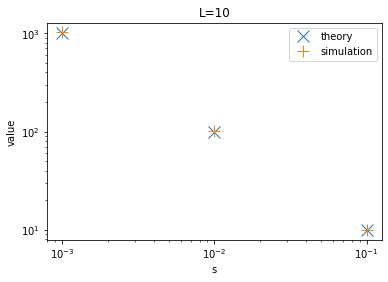

In [150]:
Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=10
num_demes = L**2
list1 = pd.read_csv('L10_list1.csv',header=None)
times = pd.read_csv('L10_times.csv',header=None)

# print(np.array(list1)[:,0])

list1 = np.array(list1)[:,0]
times = [sublist[0] for sublist in np.array(times)]


 
sims_adj = [list1[i]*times[i]*Nd for i in range(len(list1))]

# print(sims_adj)

plt.plot(s_list,[1/s for s in s_list],marker='x',label='theory',linestyle='')
plt.plot(s_list,sims_adj,marker='+',label='simulation',linestyle='')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel('value')
plt.legend()
plt.title("L="+str(L))
plt.show()

Checking values for variance in total number of alleles

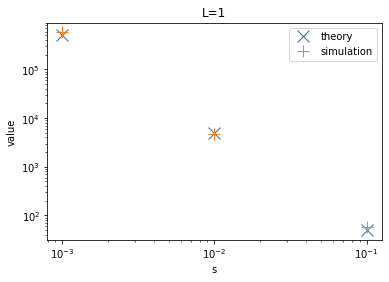

In [176]:
#L=1 - only one value to check (k=0)

Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=1
l=1
num_demes = (L/l)**2
list3 = pd.read_csv('L1_list3.csv',header=None)
times = pd.read_csv('L1_times.csv',header=None)

list3 = np.array(list3)[:,0]
times = [sublist[0] for sublist in np.array(times)]
 
sims_adj = [list3[i]*times[i]*(Nd**2) for i in range(len(list3))]

# print(sims_adj)

plt.plot(s_list,[1/(2*s**2) for s in s_list],marker='x',label='theory',linestyle='')
plt.plot(s_list,sims_adj,marker='+',label='simulation',linestyle='')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel('value')
plt.legend()
plt.title("L="+str(L))
plt.show()

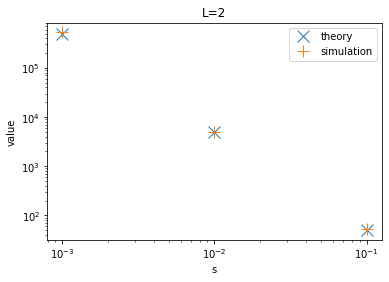

In [184]:
#L=2 

Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=2
l=1
num_demes = (L/l)**2
list3 = pd.read_csv('L2_list3.csv',header=None)
times = pd.read_csv('L2_times.csv',header=None)

list3 = np.array(list3)[:,0]
times = [sublist[0] for sublist in np.array(times)]


 
sims_adj = [list3[i]*times[i]*(Nd**2) for i in range(len(list3))]

# print(sims_adj)

plt.plot(s_list,[1/(2*s**2) for s in s_list],marker='x',label='theory',linestyle='')
plt.plot(s_list,sims_adj,marker='+',label='simulation',linestyle='')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel('value')
plt.legend()
plt.title("L="+str(L))
plt.show()

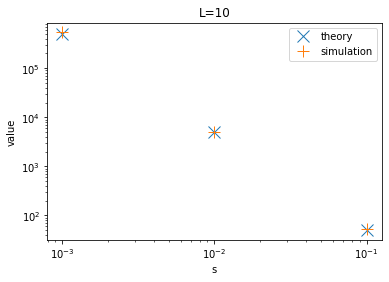

In [185]:
#L=10 

Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=10
l=1
num_demes = (L/l)**2
list3 = pd.read_csv('L10_list3.csv',header=None)
times = pd.read_csv('L10_times.csv',header=None)

list3 = np.array(list3)[:,0]
times = [sublist[0] for sublist in np.array(times)]

sims_adj = [list3[i]*times[i]*(Nd**2) for i in range(len(list3))]

# print(sims_adj)

plt.plot(s_list,[1/(2*s**2) for s in s_list],marker='x',label='theory',linestyle='')
plt.plot(s_list,sims_adj,marker='+',label='simulation',linestyle='')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel('value')
plt.legend()
plt.title("L="+str(L))
plt.show()

Check values of expression (2).

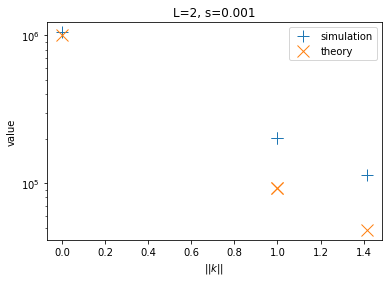

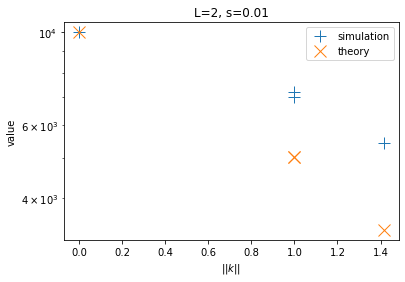

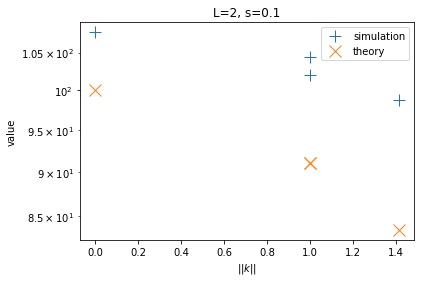

In [183]:
#L=2

Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=2
l=1
m = 1e-3
num_demes = (L/l)**2
list3 = pd.read_csv('L2_list3.csv',header=None)
times = pd.read_csv('L2_times.csv',header=None)
kvals = np.array(pd.read_csv('L2_k_list.csv',header=None))
times = [sublist[0] for sublist in np.array(times)]

kvals_norm = [np.linalg.norm((kvals[i][0],kvals[i][1])) for i in range(len(kvals))]
for j in range(len(s_list)):
    list3_temp = np.array(list3)[j,:]
    sims_adj_temp=[2*list3_temp[i]*times[j]*(Nd**2) for i in range(len(list3_temp))]
    plt.plot(kvals_norm,sims_adj_temp,marker='+',linestyle='',label="simulation")
    plt.plot(kvals_norm,[1/(s_list[j]*(s_list[j]+m*(l**2)*((2*np.pi/L)**2)*(kn**2))) for kn in kvals_norm],marker='x',linestyle='',label="theory")
    plt.title("L="+str(L)+", s="+str(s_list[j]))
    plt.yscale('log')
    plt.xlabel(r"$\||k\||$")
    plt.ylabel("value")
    plt.legend()
    plt.show()


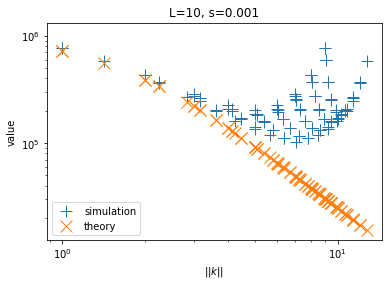

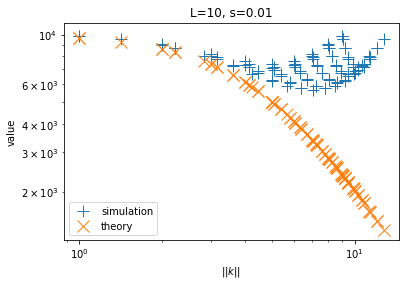

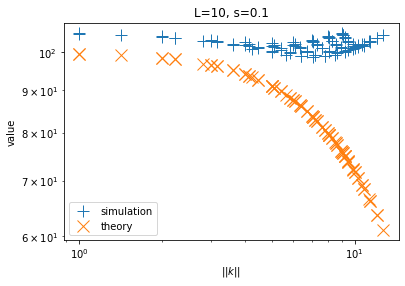

In [182]:
#L=10

Nd=10000
s_list = [1e-3,1e-2,1e-1]

L=10
l=1
m = 1e-3
num_demes = (L/l)**2
list3 = pd.read_csv('L10_list3.csv',header=None)
times = pd.read_csv('L10_times.csv',header=None)
kvals = np.array(pd.read_csv('L10_k_list.csv',header=None))
times = [sublist[0] for sublist in np.array(times)]

kvals_norm = [np.linalg.norm((kvals[i][0],kvals[i][1])) for i in range(len(kvals))]
# print(kvals_norm)
for j in range(len(s_list)):
    list3_temp = np.array(list3)[j,:]
    sims_adj_temp=[2*list3_temp[i]*times[j]*(Nd**2) for i in range(len(list3_temp))]
    plt.plot(kvals_norm,sims_adj_temp,marker='+',linestyle='',label="simulation")
    plt.plot(kvals_norm,[1/(s_list[j]*(s_list[j]+m*(l**2)*((2*np.pi/L)**2)*(kn**2))) for kn in kvals_norm],marker='x',linestyle='',label="theory")
    plt.title("L="+str(L)+", s="+str(s_list[j]))
    plt.legend()
    plt.xlabel(r"$\||k\||$")
    plt.ylabel("value")
    plt.yscale('log')
#     plt.ylim(0.1/(s_list[j]**2),10/(s_list[j]**2))
    plt.xscale('log')
    plt.show()
